In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Binary classification kullanarak bir kişinin belli bir bilgilerini kullanarak kardiyovasküler hastalığı olup olmadığını tahmin etme uygulaması

In [2]:
df = pd.read_csv('cardio_train.csv',sep=';')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.drop('id', axis = 1, inplace = True) #id kolonunu kullamıyacağım için sildim.

Veri setii incelediğimizde içersindeki değerler gün olarak verilmiş bir 'age' kolonu, cinsiyet bilgisini 1 ve 2 şeklinde kategorik olarak tutan gender kolonu,height,weight(boy,kilo) kolonlarımız var.Bir de hastalık bulgusunu bulmamıza  yarayacak olan müayene edilerek ölçülmüş veriler var.bunlar tansiyon,kan basıncı,kolestrol,glukoz değerleri..Diger bilgiler sigara, alkol kullanıp-kullanılmadığı ve fizisel aktivite yapılıp yapılmadığıdır.En  son kolonda ise bu kişilerin kardiyovasküler hastalığının olup olmadığını gösteren cardio kolonudur.Yani bizim Target degerlerimiz...

In [5]:
df.info() #Değişkenlerimizin özelliklerine bakalım.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


70000 verimiz 12 kolonomuz var ayrıca eksik verimizde yok!

Veri seti üzerinde işlemlerimizden önce tekrar eden değerleri ele almak gerekirse tekrar eden değerlerin model eğitimde herhangi bir etkisi yktur.Aksine sadece eğitim boyutunu arttırırlar..

In [6]:
print("{} tane var".format(df.duplicated().sum()))#Bu tekrarlı verileri bulmak için

24 tane var


In [7]:
dp = df[df.duplicated(keep=False)] #tekrarlı verileri bir değişkene aktardık
dp = dp.sort_values(by=['age', "gender", "height"], ascending= False) #Daha güzel görüntülemek için

dp.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
2677,22077,1,175,69.0,120,80,1,1,0,0,1,1
45748,22077,1,175,69.0,120,80,1,1,0,0,1,1


Yukarıda birbiriyle aynı bilgileri tutan satırları görüyoruz..

In [8]:
df.drop_duplicates(inplace= True) #Tekrarlı verileri siliyoruz ve yazdırıyoruz.
print("{} tane var".format(df.duplicated().sum()))

0 tane var


Sırada aykırı değerlerimizi tespit etmek var. Aykırı değeri tespit etmek ve bunları ele almak doğruluk değerimizi artırabilir.

In [9]:
df.describe().T # Burada T tranzpozunu olarak daha güzel görntülememizi sağlıyor.Bu inceleme ile bu veri kümesi hakkında bazı kilit noktaları görebiliriz.

,count,mean,std,min,25%,50%,75%,max
age,69976.0,19468.950126,2467.374620,10798.0,17664.0,19703.0,21327.0,23713.0
gender,69976.0,1.349648,0.476862,1.0,1.0,1.0,2.0,2.0
height,69976.0,164.359152,8.211218,55.0,159.0,165.0,170.0,250.0
weight,69976.0,74.208519,14.397211,10.0,65.0,72.0,82.0,200.0
ap_hi,69976.0,128.820453,154.037729,-150.0,120.0,120.0,140.0,16020.0
ap_lo,69976.0,96.636261,188.504581,-70.0,80.0,80.0,90.0,11000.0
cholesterol,69976.0,1.366997,0.680333,1.0,1.0,1.0,2.0,3.0
gluc,69976.0,1.226535,0.572353,1.0,1.0,1.0,1.0,3.0
smoke,69976.0,0.088159,0.283528,0.0,0.0,0.0,0.0,1.0
alco,69976.0,0.053790,0.225604,0.0,0.0,0.0,0.0,1.0


Height kolonu için min ve max değerler hatalı geliyor.Şimdiye kadar bilinen en küçük insan (54.64cm) en uzun(251.46cm) olmasına rağmen burada hata görünüyor.min ağırlık içinde aynı sonuçları söyleyebiliriz.min değerler gibi tansiyon kanbasıncı negatif olamaz! Ayrıca tansiyn(180) ve kanbasıncı(120) den fazlaysa bu bir acil durumdur.Ancak burada 16020mmHg ve 11000mmHg.İşte bunlara Aykrı değer diyoruz (çünkü diğer gözlemlerden önemli ölçüde farklı olan br veri noktası)mevcut.Bu durum ölçümdeki değişkenlikten kaynaklanıyor olabilir veya deneysel hatayı gösterebilir.

Bir boxplot kullanarak height ve weight kolonları için aykırı verilerimizi gösterelim.

<AxesSubplot:xlabel='cardio', ylabel='weight'>

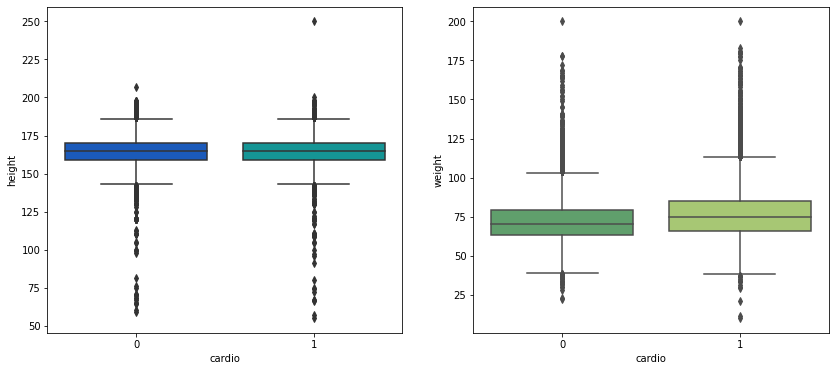

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(14,6))  #Cardio kolonunu kullanarak height ve weight kolonları için aykırı verilermzi gösterelim
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='height',data=df,palette='winter')
plt.subplot(1,2,2)
sns.boxplot(x='cardio',y='weight',data=df,palette='summer')

Height ve Weight değişkenlerini bir arada düşünerek aykırı değerler ile ilgilenmek daha doğr bir yaklaşım olacağından Vucut kitle indeksi(BMİ)(bmi=tibbi değerlendirme ve kalp sağlığı için kullanılan yaygın bir ölçüm).bmi=ağırlık/(boy)^2 ile hesaplanır.

In [11]:
df["bmi"] = (df["weight"] / (df["height"] / 100)**2).round(1)

In [12]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.9
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.5
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.7
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0


Şimdi aşırı zayıf ve obez insanları çıkaralım.Çünkü bu tür durumlar imkansız görünüyor.(80cm ve 165 kilo insan çok garip olur. :) Ya sahte gözlem ya da yazım hatası olabilir.Bu yüzden onları dahil etmiyeceğiz..

In [13]:
df = df[(df["bmi"]>10) & (df["bmi"]<100)]

In [14]:
df.drop(["weight","height"],axis = 1,inplace = True) #Artık height ve Weight değişkenlerimize ihtiyacımız yok sildim onları.

Şimdi tansiyon ve kanbasıncı değerlerimizin negatif olmayacağını ve hatta sırasıyla 180 ve 120 den fazla değerlerin acil durumu gösterdiğinden misal 200 ve 250 den yüksek değerleri bu uygulamamızda almayalım.Ayrıca 20 den büyük degerleri de seçerek de hem negatifleri hem çok küçük değerleri de almamış oluyoruz..

In [15]:
df = df[(df['ap_hi'] < 250) & (df['ap_lo'] < 200)]
df = df[(df['ap_hi'] > 20) & (df['ap_lo'] > 20)]

df['age'] =  df['age'] / 365 #Age gün olaraktı yıla çevirdik

In [16]:
df.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.391781,2,110,80,1,1,0,0,1,0,22.0
1,55.419178,1,140,90,3,1,0,0,1,1,34.9
2,51.663014,1,130,70,3,1,0,0,0,1,23.5
3,48.282192,2,150,100,1,1,0,0,1,1,28.7
4,47.873973,1,100,60,1,1,0,0,0,0,23.0


In [17]:
df['cholesterol'].unique()

array([1, 3, 2], dtype=int64)

Şimdi katogorik değişkenlerimize bakacak olursak kolstrol ve glkoz değerlerimiiz 1,2,3 rakamlarıyla ifade edilmiş..Modelimize bu şekil verirsek 3 ü 2 den üstün görebilir.Bu nedenle encoding işlemi yapaylım. #one-hot encoding

In [18]:
df['cholesterol'] = df['cholesterol'].map({ 1: 'normal', 2: 'aboveNormal', 3: 'wellAboveNormal'})
df['gluc']=df['gluc'].map({ 1: 'normal', 2: 'aboveNormal', 3: 'wellAboveNormal'}) #Katogorilerimizi adlandırdık.

dummies = pd.get_dummies(df[['cholesterol','gluc']]) #Dummy Her bir katogori için değişken oluşturuyor. Bu şekilde Modele verdiğimizde nominal değişkenlerimiz birbirine üstünkük sağlamamış oluyor.


final_df = pd.concat([df,dummies],axis=1)
final_df.drop(['cholesterol','gluc'],axis=1,inplace=True)
final_df.head()

,age,gender,ap_hi,ap_lo,smoke,alco,active,cardio,bmi,cholesterol_aboveNormal,cholesterol_normal,cholesterol_wellAboveNormal,gluc_aboveNormal,gluc_normal,gluc_wellAboveNormal
0,50.391781,2,110,80,0,0,1,0,22.0,0,1,0,0,1,0
1,55.419178,1,140,90,0,0,1,1,34.9,0,0,1,0,1,0
2,51.663014,1,130,70,0,0,0,1,23.5,0,0,1,0,1,0
3,48.282192,2,150,100,0,0,1,1,28.7,0,1,0,0,1,0
4,47.873973,1,100,60,0,0,0,0,23.0,0,1,0,0,1,0


In [19]:
final_df["gender"] = final_df["gender"] % 2 #gender değişkenini 2 olanı 0 yapalım mod alarak.

In [20]:
from sklearn.model_selection import train_test_split #Modellemeye geçtiğimizde sklearn un train test kütp. ekledik

y = final_df["cardio"] #ilk olarak target değişkenimiz olan cardio yu y'ye atadım.
X = final_df.drop("cardio", axis = 1) # x değişkeni ise cardio hariç bütün veri seti olsun.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [21]:
X_train.shape

(48107, 14)

In [22]:
X_test.shape

(20618, 14)

Son olarak scikit learn kütp. logistic regression modelini kullanıyoruz 

In [23]:
from sklearn.linear_model import LogisticRegression #scikit learn kütp. logistic regression modelini kullanıyoruz 
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()

logreg.fit(X_train,y_train) #fit ile eğitiyoruz.Burada fit elimizde train olarak ayırdığımız verilerden öğrenme gerçekleştiriyor.

y_pred = pd.Series(logreg.predict(X_test))#predict kullanarak x_test verileri kullanarak hastalık olup olmadığına dair tahminle üretiyor.  

accuracy_score(y_test,y_pred)# bunu y_pred e aktaıp daha önceden ayırmış olduğumuz y_test verileri ile karşılaştırıyot.

0.72116597148123